# Imputation

## Importing

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer # treat only specific columns like encode this and not that
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_csv('Data/movie_data_w_star_power.csv')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_12000\3917288982.py:1: DtypeWarning: Columns (6,18,19,20,21,23,25,27,28,29,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/movie_data_w_star_power.csv')


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,...,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power,director_power
0,0,0,False,30000000.0,en,21.946943,1995-10-30,Released,7.7,5415.0,...,81.0,1995.0,Toy Story,mid,343554033.0,1.145180e+03,all_time_blockbuster,10.0,0.0,0.0
1,1,1,False,65000000.0,en,17.015539,1995-12-15,Released,6.9,2413.0,...,104.0,1995.0,Jumanji,high,197797249.0,3.043035e+02,all_time_blockbuster,12.0,0.0,0.0
2,2,2,False,0.0,en,11.712900,1995-12-22,Released,6.5,92.0,...,101.0,1995.0,Grumpier Old Men,low,0.0,0.000000e+00,below_avg,12.0,0.0,0.0
3,3,3,False,16000000.0,en,3.859495,1995-12-22,Released,6.1,34.0,...,127.0,1995.0,Waiting to Exhale,mid,65452156.0,4.090760e+02,all_time_blockbuster,12.0,0.0,0.0
4,4,4,False,0.0,en,8.387519,1995-02-10,Released,5.7,173.0,...,106.0,1995.0,Father of the Bride Part II,low,76578911.0,7.657891e+14,all_time_blockbuster,2.0,0.0,0.0


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)


In [6]:
df.head()

,adult,budget,original_language,popularity,release_date,status,vote_average,vote_count,certificate,rating,director,director_id,star,star_id,votes,collection_id,collection_name,spoken_language_1,spoken_language_2,production_company_1_name,production_company_1_id,production_company_2_name,production_company_2_id,production_company_3_name,production_company_3_id,production_country_1_name,production_country_2_name,production_country_3_name,genre_Action,genre_Adult,genre_Adventure,genre_Animation,genre_Aniplex,genre_BROSTA TV,genre_Biography,genre_Carousel Productions,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_Foreign,genre_Game-Show,genre_GoHands,genre_History,genre_Horror,genre_Mardock Scramble Production Committee,genre_Music,genre_Musical,genre_Mystery,genre_News,genre_Odyssey Media,genre_Pulser Productions,genre_Reality-TV,genre_Rogue State,genre_Romance,genre_Sci-Fi,genre_Science Fiction,genre_Sentai Filmworks,genre_Sport,genre_TV Movie,genre_Telescene Film Group Productions,genre_The Cartel,genre_Thriller,genre_Vision View Entertainment,genre_War,genre_Western,revenue,runtime,release_year,movie_title,budget_class,profit,profit_percent,movie_class,release_month,star_power,director_power
0,False,30000000.0,en,21.946943,1995-10-30,Released,7.7,5415.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10194.0,Toy Story Collection,English,NaN,Pixar Animation Studios,3.0,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,373554033.0,81.0,1995.0,Toy Story,mid,343554033.0,1.145180e+03,all_time_blockbuster,10.0,0.0,0.0
1,False,65000000.0,en,17.015539,1995-12-15,Released,6.9,2413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,Français,TriStar Pictures,559.0,Teitler Film,2550.0,Interscope Communications,10201.0,United States of America,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,262797249.0,104.0,1995.0,Jumanji,high,197797249.0,3.043035e+02,all_time_blockbuster,12.0,0.0,0.0
2,False,0.0,en,11.712900,1995-12-22,Released,6.5,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119050.0,Grumpy Old Men Collection,English,NaN,Warner Bros.,6194.0,Lancaster Gate,19464.0,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,101.0,1995.0,Grumpier Old Men,low,0.0,0.000000e+00,below_avg,12.0,0.0,0.0
3,False,16000000.0,en,3.859495,1995-12-22,Released,6.1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN,Twentieth Century Fox Film Corporation,306.0,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81452156.0,127.0,1995.0,Waiting to Exhale,mid,65452156.0,4.090760e+02,all_time_blockbuster,12.0,0.0,0.0
4,False,0.0,en,8.387519,1995-02-10,Released,5.7,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96871.0,Father of the Bride Collection,English,NaN,Sandollar Productions,5842.0,Touchstone Pictures,9195.0,NaN,NaN,United States of America,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76578911.0,106.0,1995.0,Father of the Bride Part II,low,76578911.0,7.657891e+14,all_time_blockbuster,2.0,0.0,0.0


## Feature Selection

In [7]:
X = df[['budget','release_year','release_month','runtime','certificate','star_power','director_power']]
y = df['movie_class']

In [8]:
X.isna().sum()

budget                 0
release_year           0
release_month     119322
runtime            53899
certificate       724919
star_power             0
director_power         0
dtype: int64

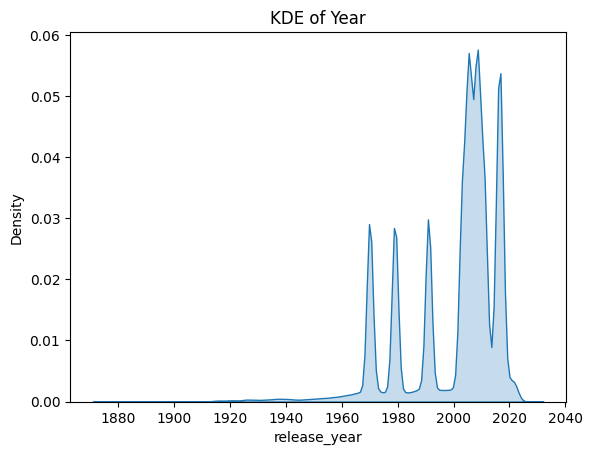

In [9]:
sns.kdeplot(X['release_year'], fill=True)
plt.title("KDE of Year")
plt.show()

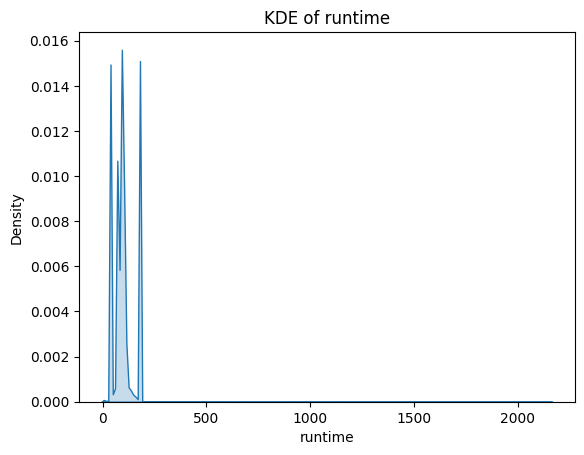

In [10]:
sns.kdeplot(X['runtime'], fill=True)
plt.title("KDE of runtime")
plt.show()

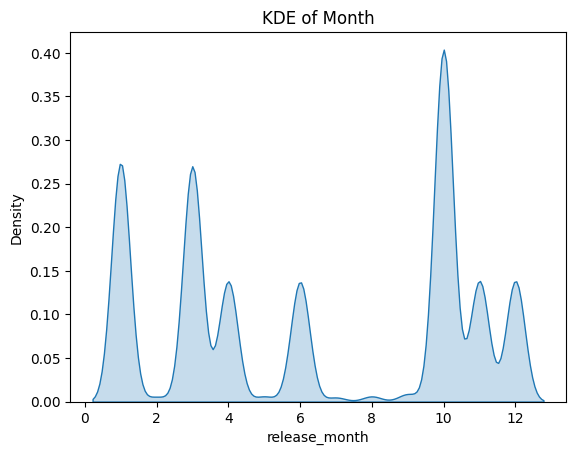

In [11]:
sns.kdeplot(X['release_month'], fill=True)
plt.title("KDE of Month")
plt.show()

In [12]:
X['certificate'].unique()

array([nan, 'Approved', 'Passed', 'R', 'PG', 'Not Rated', 'G', 'GP',
       'M/PG', 'Unrated', 'TV-PG', 'TV-14', 'PG-13', 'TV-MA', '18+',
       '13+', 'M', 'TV-Y7', 'TV-G', 'NC-17', '16+', 'X', 'TV-Y7-FV',
       'TV-Y', '12', 'MA-13', 'E', 'T', 'E10+', 'Open', 'AO', 'TV-13'],
      dtype=object)

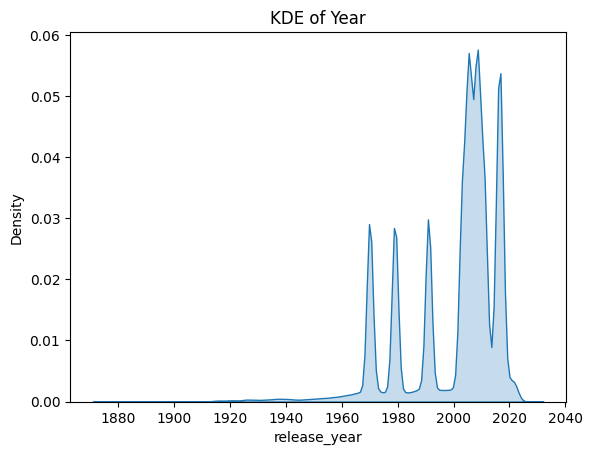

In [13]:
sns.kdeplot(X['release_year'], fill=True)
plt.title("KDE of Year")
plt.show()

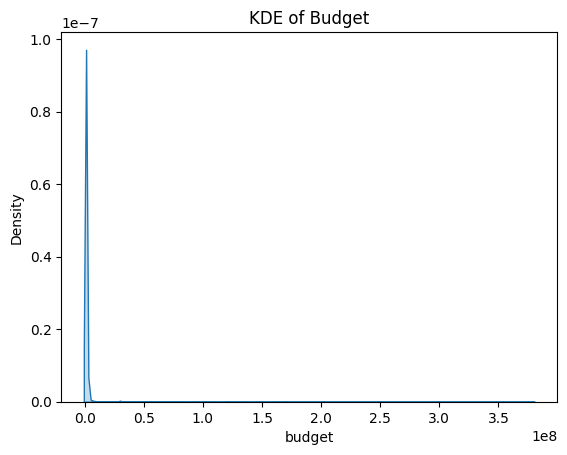

In [14]:
sns.kdeplot(X['budget'], fill=True)
plt.title("KDE of Budget")
plt.show()

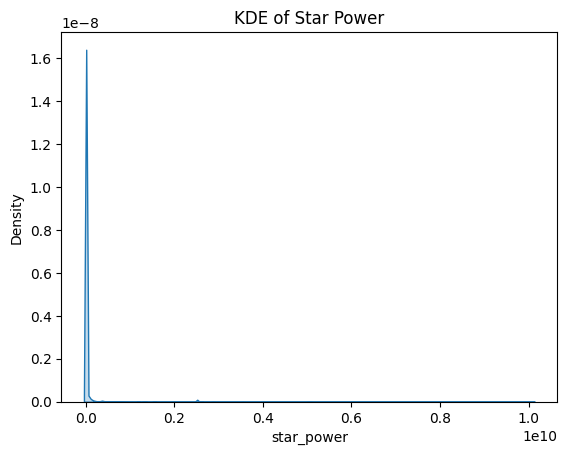

In [15]:
sns.kdeplot(X['star_power'], fill=True)
plt.title("KDE of Star Power")
plt.show()

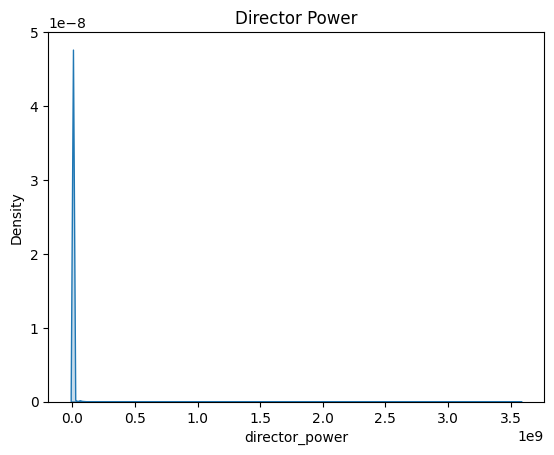

In [16]:
sns.kdeplot(X['director_power'], fill=True)
plt.title("Director Power")
plt.show()

## Combining and Pipelining

In [19]:
numeric_min_max = ['budget', 'director_power', 'star_power']
numeric_standard = ['release_month', 'release_year']
categorical_features = ['certificate']

numeric_transformer_imputer = Pipeline([
    ('imputer', IterativeImputer(random_state=0)),
    ('scaler_standard', StandardScaler())
])
numeric_transformer_min_max = Pipeline([
    ('scaler_min_max', MinMaxScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Rated')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num1', numeric_transformer_imputer, numeric_standard),
        ('cat', categorical_transformer, categorical_features),
        ('num2', numeric_transformer_min_max, numeric_min_max),
    ])

preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])